In [ ]:
#importation des dépendances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score
from fastcore.basics import *
from fastcore.parallel import *

In [ ]:
%%time
network_data_d1 = pd.read_csv(r'/content/02-14-2018.csv', low_memory=False)
network_data_d2 = pd.read_csv(r'/content/02-15-2018.csv', low_memory=False)
network_data_d3 = pd.read_csv(r'/content/02-16-2018.csv', low_memory=False)
network_data_d9 = pd.read_csv(r'/content/03-01-2018.csv', low_memory=False)
network_data_d10 = pd.read_csv(r'/content/03-02-2018.csv', low_memory=False)

CPU times: user 1min 55s, sys: 11.6 s, total: 2min 6s
Wall time: 2min 13s


In [ ]:
network_data_d1=network_data_d1.fillna(0)
network_data_d2=network_data_d2.fillna(0)
network_data_d3=network_data_d3.fillna(0)
network_data_d9=network_data_d9.fillna(0)
network_data_d10=network_data_d10.fillna(0)

In [ ]:
print( 'd1_NA',network_data_d1.isna().sum())
print( 'd2_NA',network_data_d2.isna().sum())
print( 'd3_NA',network_data_d3.isna().sum())
print( 'd9_NA',network_data_d9.isna().sum())
print( 'd10_NA',network_data_d10.isna().sum())

d1_NA Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64
d2_NA Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64
d3_NA Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64
d9_NA Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64
d10_NA Dst Port         0
Protocol      

In [ ]:
def fixDataType(df_dataset):

    df_dataset = df_dataset[df_dataset['Dst Port'] != 'Dst Port']

    df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int , errors='ignore')
    df_dataset['Protocol'] = df_dataset['Protocol'].astype(int , errors='ignore')
    df_dataset['Flow Duration'] = df_dataset['Flow Duration'].astype(int , errors='ignore')
    df_dataset['Tot Fwd Pkts'] = df_dataset['Tot Fwd Pkts'].astype(int , errors='ignore')
    df_dataset['Tot Bwd Pkts'] = df_dataset['Tot Bwd Pkts'].astype(int , errors='ignore')
    df_dataset['TotLen Fwd Pkts'] = df_dataset['TotLen Fwd Pkts'].astype(int , errors='ignore')
    df_dataset['TotLen Bwd Pkts'] = df_dataset['TotLen Bwd Pkts'].astype(int, errors='ignore')
    df_dataset['Fwd Pkt Len Max'] = df_dataset['Fwd Pkt Len Max'].astype(int, errors='ignore')
    df_dataset['Fwd Pkt Len Min'] = df_dataset['Fwd Pkt Len Min'].astype(int, errors='ignore')
    df_dataset['Fwd Pkt Len Mean'] = df_dataset['Fwd Pkt Len Mean'].astype(float, errors='ignore')
    df_dataset['Fwd Pkt Len Std'] = df_dataset['Fwd Pkt Len Std'].astype(float, errors='ignore')
    df_dataset['Bwd Pkt Len Max'] = df_dataset['Bwd Pkt Len Max'].astype(int, errors='ignore')
    df_dataset['Bwd Pkt Len Min'] = df_dataset['Bwd Pkt Len Min'].astype(int, errors='ignore')
    df_dataset['Bwd Pkt Len Mean'] = df_dataset['Bwd Pkt Len Mean'].astype(float, errors='ignore')
    df_dataset['Bwd Pkt Len Std'] = df_dataset['Bwd Pkt Len Std'].astype(float, errors='ignore')
    df_dataset['Flow Byts/s'] = df_dataset['Flow Byts/s'].astype(float, errors='ignore')
    df_dataset['Flow Pkts/s'] = df_dataset['Flow Pkts/s'].astype(float, errors='ignore')
    df_dataset['Flow IAT Mean'] = df_dataset['Flow IAT Mean'].astype(float, errors='ignore')
    df_dataset['Flow IAT Std'] = df_dataset['Flow IAT Std'].astype(float, errors='ignore')
    df_dataset['Flow IAT Max'] = df_dataset['Flow IAT Max'].astype(int, errors='ignore')
    df_dataset['Flow IAT Min'] = df_dataset['Flow IAT Min'].astype(int, errors='ignore')
    df_dataset['Fwd IAT Tot'] = df_dataset['Fwd IAT Tot'].astype(int, errors='ignore')
    df_dataset['Fwd IAT Mean'] = df_dataset['Fwd IAT Mean'].astype(float, errors='ignore')
    df_dataset['Fwd IAT Std'] = df_dataset['Fwd IAT Std'].astype(float, errors='ignore')
    df_dataset['Fwd IAT Max'] = df_dataset['Fwd IAT Max'].astype(int, errors='ignore')
    df_dataset['Fwd IAT Min'] = df_dataset['Fwd IAT Min'].astype(int, errors='ignore')
    df_dataset['Bwd IAT Tot'] = df_dataset['Bwd IAT Tot'].astype(int, errors='ignore')
    df_dataset['Bwd IAT Mean'] = df_dataset['Bwd IAT Mean'].astype(float, errors='ignore')
    df_dataset['Bwd IAT Std'] = df_dataset['Bwd IAT Std'].astype(float, errors='ignore')
    df_dataset['Bwd IAT Max'] = df_dataset['Bwd IAT Max'].astype(int, errors='ignore')
    df_dataset['Bwd IAT Min'] = df_dataset['Bwd IAT Min'].astype(int, errors='ignore')
    df_dataset['Fwd PSH Flags'] = df_dataset['Fwd PSH Flags'].astype(int, errors='ignore')
    df_dataset['Bwd PSH Flags'] = df_dataset['Bwd PSH Flags'].astype(int, errors='ignore')
    df_dataset['Fwd URG Flags'] = df_dataset['Fwd URG Flags'].astype(int, errors='ignore')
    df_dataset['Bwd URG Flags'] = df_dataset['Bwd URG Flags'].astype(int, errors='ignore')
    df_dataset['Fwd Header Len'] = df_dataset['Fwd Header Len'].astype(int, errors='ignore')
    df_dataset['Bwd Header Len'] = df_dataset['Bwd Header Len'].astype(int, errors='ignore')
    df_dataset['Fwd Pkts/s'] = df_dataset['Fwd Pkts/s'].astype(float, errors='ignore')
    df_dataset['Bwd Pkts/s'] = df_dataset['Bwd Pkts/s'].astype(float, errors='ignore')
    df_dataset['Pkt Len Min'] = df_dataset['Pkt Len Min'].astype(int, errors='ignore')
    df_dataset['Pkt Len Max'] = df_dataset['Pkt Len Max'].astype(int, errors='ignore')
    df_dataset['Pkt Len Mean'] = df_dataset['Pkt Len Mean'].astype(float, errors='ignore')
    df_dataset['Pkt Len Std'] = df_dataset['Pkt Len Std'].astype(float, errors='ignore')
    df_dataset['Pkt Len Var'] = df_dataset['Pkt Len Var'].astype(float, errors='ignore')
    df_dataset['FIN Flag Cnt'] = df_dataset['FIN Flag Cnt'].astype(int, errors='ignore')
    df_dataset['SYN Flag Cnt'] = df_dataset['SYN Flag Cnt'].astype(int, errors='ignore')
    df_dataset['RST Flag Cnt'] = df_dataset['RST Flag Cnt'].astype(int, errors='ignore')
    df_dataset['PSH Flag Cnt'] = df_dataset['PSH Flag Cnt'].astype(int, errors='ignore')
    df_dataset['ACK Flag Cnt'] = df_dataset['ACK Flag Cnt'].astype(int, errors='ignore')
    df_dataset['URG Flag Cnt'] = df_dataset['URG Flag Cnt'].astype(int, errors='ignore')
    df_dataset['CWE Flag Count'] = df_dataset['CWE Flag Count'].astype(int, errors='ignore')
    df_dataset['ECE Flag Cnt'] = df_dataset['ECE Flag Cnt'].astype(int, errors='ignore')
    df_dataset['Down/Up Ratio'] = df_dataset['Down/Up Ratio'].astype(int, errors='ignore')
    df_dataset['Pkt Size Avg'] = df_dataset['Pkt Size Avg'].astype(float, errors='ignore')
    df_dataset['Fwd Seg Size Avg'] = df_dataset['Fwd Seg Size Avg'].astype(float, errors='ignore')
    df_dataset['Bwd Seg Size Avg'] = df_dataset['Bwd Seg Size Avg'].astype(float, errors='ignore')
    df_dataset['Fwd Byts/b Avg'] = df_dataset['Fwd Byts/b Avg'].astype(int, errors='ignore')
    df_dataset['Fwd Pkts/b Avg'] = df_dataset['Fwd Pkts/b Avg'].astype(int, errors='ignore')
    df_dataset['Fwd Blk Rate Avg'] = df_dataset['Fwd Blk Rate Avg'].astype(int, errors='ignore')
    df_dataset['Bwd Byts/b Avg'] = df_dataset['Bwd Byts/b Avg'].astype(int, errors='ignore')
    df_dataset['Bwd Pkts/b Avg'] = df_dataset['Bwd Pkts/b Avg'].astype(int, errors='ignore')
    df_dataset['Bwd Blk Rate Avg'] = df_dataset['Bwd Blk Rate Avg'].astype(int, errors='ignore')
    df_dataset['Subflow Fwd Pkts'] = df_dataset['Subflow Fwd Pkts'].astype(int, errors='ignore')
    df_dataset['Subflow Fwd Byts'] = df_dataset['Subflow Fwd Byts'].astype(int, errors='ignore')
    df_dataset['Subflow Bwd Pkts'] = df_dataset['Subflow Bwd Pkts'].astype(int, errors='ignore')
    df_dataset['Subflow Bwd Byts'] = df_dataset['Subflow Bwd Byts'].astype(int, errors='ignore')
    df_dataset['Init Fwd Win Byts'] = df_dataset['Init Fwd Win Byts'].astype(int, errors='ignore')
    df_dataset['Init Bwd Win Byts'] = df_dataset['Init Bwd Win Byts'].astype(int, errors='ignore')
    df_dataset['Fwd Act Data Pkts'] = df_dataset['Fwd Act Data Pkts'].astype(int, errors='ignore')
    df_dataset['Fwd Seg Size Min'] = df_dataset['Fwd Seg Size Min'].astype(int, errors='ignore')
    df_dataset['Active Mean'] = df_dataset['Active Mean'].astype(float, errors='ignore')
    df_dataset['Active Std'] = df_dataset['Active Std'].astype(float, errors='ignore')
    df_dataset['Active Max'] = df_dataset['Active Max'].astype(int, errors='ignore')
    df_dataset['Active Min'] = df_dataset['Active Min'].astype(int, errors='ignore')
    df_dataset['Idle Mean'] = df_dataset['Idle Mean'].astype(float, errors='ignore')
    df_dataset['Idle Std'] = df_dataset['Idle Std'].astype(float, errors='ignore')
    df_dataset['Idle Max'] = df_dataset['Idle Max'].astype(int, errors='ignore')
    df_dataset['Idle Min'] = df_dataset['Idle Min'].astype(int, errors='ignore')

    return df_dataset

In [ ]:
network_data_d1 = fixDataType(network_data_d1)
network_data_d2 = fixDataType(network_data_d2)
network_data_d3 = fixDataType(network_data_d3)
network_data_d9 = fixDataType(network_data_d9)
network_data_d10 = fixDataType(network_data_d10)

<ipython-input-7-2a31169b8201>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int , errors='ignore')
<ipython-input-7-2a31169b8201>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['Protocol'] = df_dataset['Protocol'].astype(int , errors='ignore')
<ipython-input-7-2a31169b8201>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
def dataProperties(df, day):
    print(day)
    print(df.shape)
    print("========================")

In [ ]:
dataProperties(network_data_d1, "Day 1")
dataProperties(network_data_d2, "Day 2")
dataProperties(network_data_d3, "Day 3")
dataProperties(network_data_d9, "Day 9")
dataProperties(network_data_d10, "Day 10")

Day 1
(1048575, 80)
Day 2
(1048575, 80)
Day 3
(1048574, 80)
Day 9
(331100, 80)
Day 10
(1048575, 80)


In [ ]:
network_data = pd.concat([network_data_d1, network_data_d2], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d1, network_data_d2

network_data = pd.concat([network_data, network_data_d3], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d3

network_data = pd.concat([network_data, network_data_d9], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d9

network_data = pd.concat([network_data, network_data_d10], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d10

In [ ]:
print(network_data['Label'].value_counts())

Label
Benign                      3110896
DoS attacks-Hulk             461912
Bot                          286191
FTP-BruteForce               193360
SSH-Bruteforce               187589
DoS attacks-SlowHTTPTest     139890
Infilteration                 93063
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
Name: count, dtype: int64


In [ ]:
network_data['class_label'] = network_data['Label'].apply(lambda x: 0 if x == 'Benign'  else 1 )

In [ ]:
network_data['class_label'].value_counts()

,count
class_label,
0,3110896
1,1414503


In [ ]:
#Sample 1414500 records for each class
sampled_data = network_data.groupby('class_label').apply(lambda x: x.sample(n=min(1414500, len(x)) , random_state=1))

# Reset the index of the sampled data
sampled_data = sampled_data.reset_index(drop=True)
print(f"Total records in the sampled dataset: {len(sampled_data)}")

network_data = sampled_data

<ipython-input-13-52e12e1ad7b5>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = network_data.groupby('class_label').apply(lambda x: x.sample(n=min(1414500, len(x)) , random_state=1))


Total records in the sampled dataset: 2829000


In [ ]:
print(network_data['class_label'].value_counts())

class_label
0    1414500
1    1414500
Name: count, dtype: int64


In [ ]:
def visualizeBar(df):
    # bar chart of packets label
    plt.figure(figsize=(15, 5))
    plt.title('Packet Distribution')
    plt.bar(x=df['Label'].unique(), height=df['Label'].value_counts())
    p = plt.gcf()

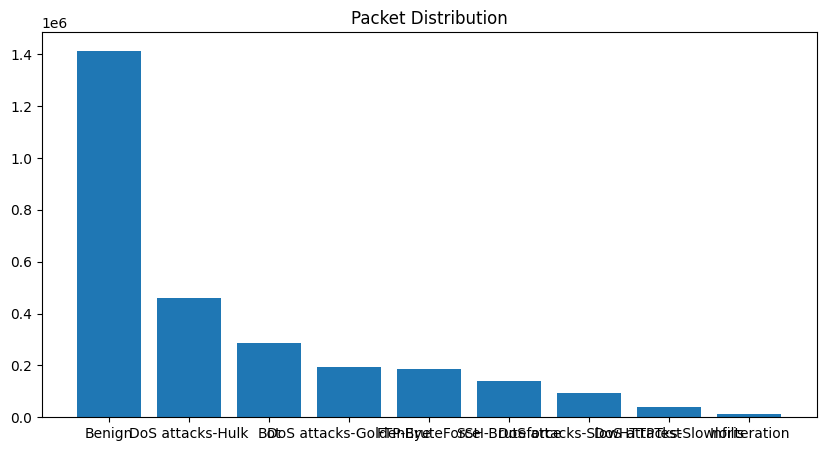

In [ ]:
visualizeBar(network_data)

In [ ]:
def visualizeBar2(df):
    # bar chart of class label
    plt.figure(figsize=(15, 5))
    plt.title('Packet Distribution')
    # plt.bar(x=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], height=network_data['Label'].value_counts(), color=['blue', 'magenta', 'cyan'])
    plt.bar(x=df['class_label'].unique(), height=df['class_label'].value_counts())
    p = plt.gcf()

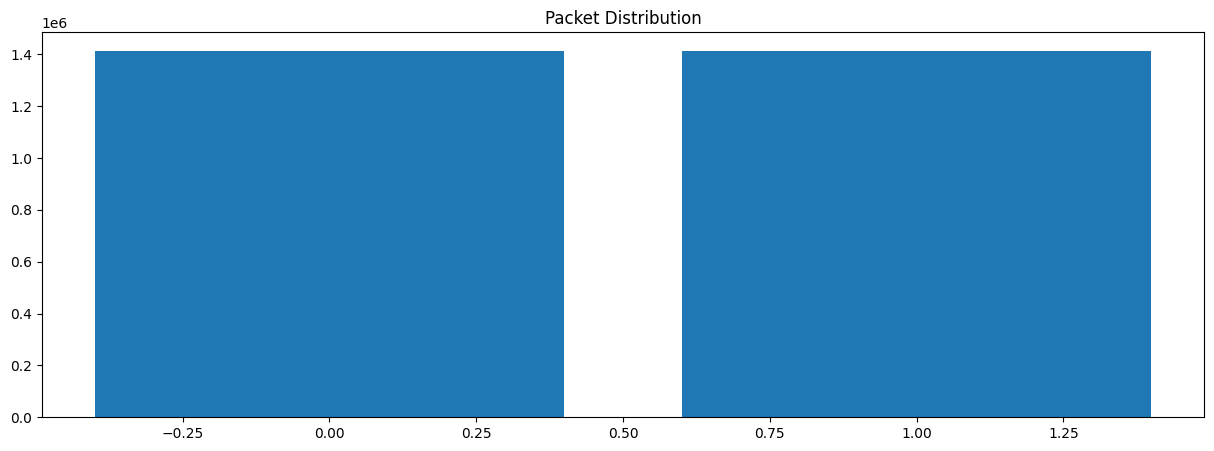

In [ ]:
visualizeBar2(network_data)

In [ ]:
variances = network_data.var(numeric_only=True)
constant_columns = variances[variances == 0].index
network_data = network_data.drop(constant_columns, axis=1)

print(constant_columns)
print (network_data.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(2829000, 73)


In [ ]:
duplicates = set()
for i in range(0, len(network_data.columns)):
    col1 = network_data.columns[i]
    for j in range(i+1, len(network_data.columns)):
        col2 = network_data.columns[j]
        if(network_data[col1].equals(network_data[col2])):
            duplicates.add(col2)

print (duplicates)
network_data.drop(duplicates, axis=1, inplace=True)
print (network_data.shape)

{'CWE Flag Count', 'SYN Flag Cnt', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Fwd Pkts'}
(2829000, 68)


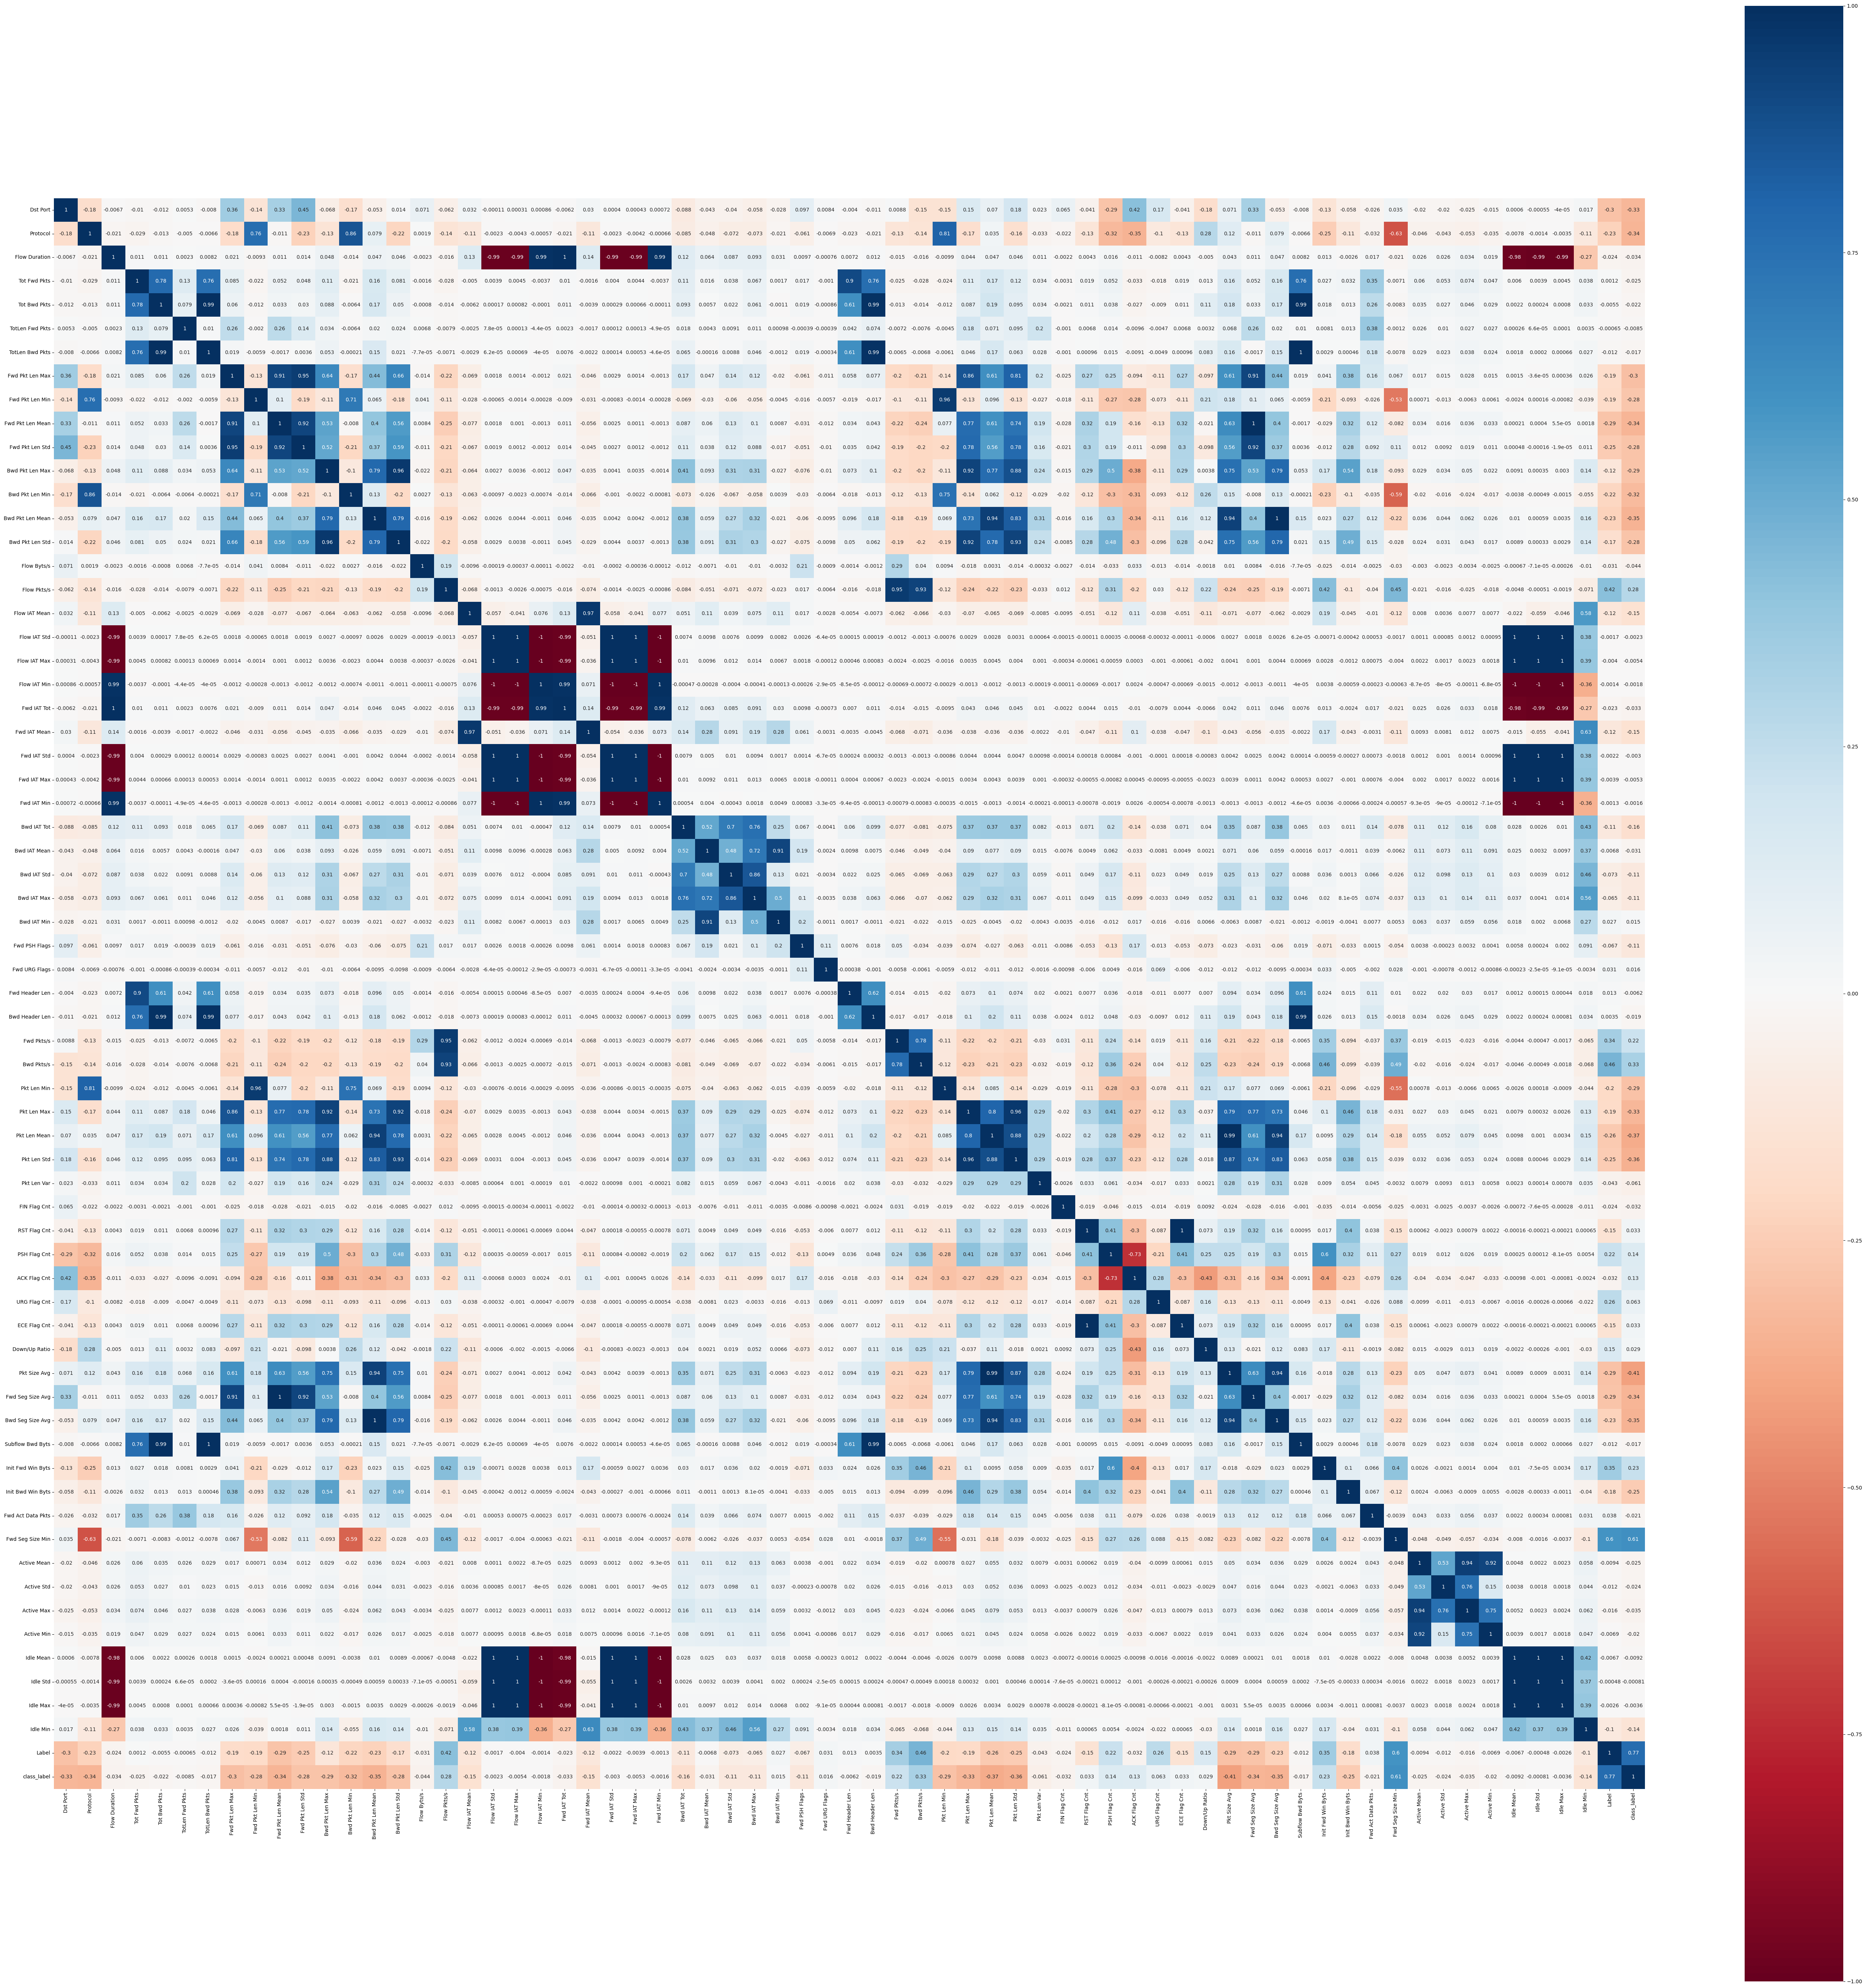

In [ ]:
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = network_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [ ]:
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Active Mean', 'Tot Bwd Pkts', 'Bwd IAT Mean', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Pkt Len Max', 'Flow IAT Mean', 'Idle Std', 'Flow Pkts/s', 'RST Flag Cnt', 'Bwd Pkt Len Std', 'Fwd Pkt Len Std', 'Fwd IAT Std', 'Pkt Size Avg', 'Bwd Pkt Len Max', 'Tot Fwd Pkts', 'Flow IAT Std', 'Fwd IAT Tot', 'Bwd Header Len', 'TotLen Bwd Pkts', 'Flow Duration', 'Flow IAT Max', 'Fwd IAT Max', 'Pkt Len Mean', 'Idle Mean', 'Flow IAT Min'}
28


In [ ]:
network_data.drop(correlated_col, axis=1, inplace=True)
print (network_data.shape)

(2829000, 40)


In [ ]:
network_data.dtypes

,0
Dst Port,int64
Protocol,int64
Timestamp,object
TotLen Fwd Pkts,int64
Bwd Pkt Len Min,int64
Flow Byts/s,float64
Fwd IAT Mean,float64
Fwd IAT Min,int64
Bwd IAT Tot,int64
Bwd IAT Std,float64


In [ ]:
network_data['class_label'].value_counts()

,count
class_label,
0,1414500
1,1414500


In [ ]:
network_data.to_csv('/content/cic-ids_maj_balanced_50_50.csv', index=False)